#IMPORTATION DES PACKAGES



L'agriculture joue un rôle essentiel dans l'économie mondiale. Avec l’expansion continue de la population humaine, la compréhension des rendements agricoles mondiaux est essentielle pour relever les défis de la sécurité alimentaire et réduire les impacts du changement climatique.

La prévision du rendement des cultures est un problème agricole important. Le rendement agricole dépend principalement des conditions météorologiques (pluie, température, etc.), des pesticides et des informations précises sur l'historique du rendement des cultures sont un élément important pour prendre des décisions liées à la gestion des risques agricoles et aux prévisions futures


In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PREPARATION DES DONNEES

In [178]:
path_data = 'yield_df.csv'
df = pd.read_csv(path_data, sep=',')
df['types_de_sols'] = np.random.choice(["Argileux", "Sableux", "Limoneux"], size=len(df))

df =df.drop('Unnamed: 0', axis=1)

# df

In [179]:
df.groupby('Area').count()
# Créer un dictionnaire de correspondance entre les pays et les régions du Sénégal
senegal_regions = {
    'Albania': 'Dakar', 'Algeria': 'Dakar', 'Angola': 'Thiès', 'Argentina': 'Thiès',
    'Armenia': 'Fatick', 'Australia':'Fatick' , 'Austria': 'Kaffrine', 'Azerbaijan': 'Kaffrine',
    'Bahamas': 'Kédougou', 'Bahrain': 'Kédougou', 'Bangladesh':'Kolda' , 'Belarus':'Kolda' ,
    'Belgium':'Louga' , 'Botswana':'Louga' ,
    'Brazil': 'Matam', 'Bulgaria': 'Matam', 'Burkina Faso': 'Saint-Louis', 'Burundi': 'Saint-Louis',
    'Cameroon': 'Sédhiou', 'Canada': 'Sédhiou', 'Central African Republic': 'Tambacounda',
    'Chile': 'Tambacounda', 'Colombia': 'Tambacounda', 'Croatia': 'Ziguinchor', 'Denmark': 'Ziguinchor',
}
plante = {'Maize': 'Mais', 'Potatoes':'Pattate', 'Rice, paddy':'Rice', 'Sorghum':'Sorgho','Soybeans': 'Mil', 'Wheat':'Arachide',
       'Cassava':'Fonio', 'Sweet potatoes':'Manioc', 'Plantains and others':'Niebe', 'Yams':'Bissap'}
# Ajouter une nouvelle colonne "Region" en utilisant le dictionnaire de correspondance
df["Area"] = df["Area"].map(senegal_regions)
df["Item"] = df["Item"].map(plante)

df = df.dropna(axis =0)


In [180]:

# df.to_csv('iibs_dataM1.csv', index=False
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,types_de_sols
0,Dakar,Mais,1990,36613,1485.0,121.0,16.37,Limoneux
1,Dakar,Pattate,1990,66667,1485.0,121.0,16.37,Sableux
2,Dakar,Rice,1990,23333,1485.0,121.0,16.37,Limoneux
3,Dakar,Sorgho,1990,12500,1485.0,121.0,16.37,Sableux
4,Dakar,Mil,1990,7000,1485.0,121.0,16.37,Argileux
...,...,...,...,...,...,...,...,...
7085,Ziguinchor,Arachide,2007,65610,703.0,3336.0,9.87,Limoneux
7086,Ziguinchor,Pattate,2008,416339,703.0,4145.0,9.82,Argileux
7087,Ziguinchor,Arachide,2008,78638,703.0,4145.0,9.82,Argileux
7088,Ziguinchor,Pattate,2009,415861,703.0,2836.0,9.22,Argileux


In [181]:
import pandas as pd
import numpy as np


In [182]:

df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,types_de_sols
0,Dakar,Mais,1990,36613,1485.0,121.0,16.37,Limoneux
1,Dakar,Pattate,1990,66667,1485.0,121.0,16.37,Sableux
2,Dakar,Rice,1990,23333,1485.0,121.0,16.37,Limoneux
3,Dakar,Sorgho,1990,12500,1485.0,121.0,16.37,Sableux
4,Dakar,Mil,1990,7000,1485.0,121.0,16.37,Argileux


In [185]:
df.shape
#Voir les dimensions

(7090, 8)

In [186]:
df.info()
#Info de note dataset

<class 'pandas.core.frame.DataFrame'>
Index: 7090 entries, 0 to 7089
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           7090 non-null   object 
 1   Item                           7090 non-null   object 
 2   Year                           7090 non-null   int64  
 3   hg/ha_yield                    7090 non-null   int64  
 4   average_rain_fall_mm_per_year  7090 non-null   float64
 5   pesticides_tonnes              7090 non-null   float64
 6   avg_temp                       7090 non-null   float64
 7   types_de_sols                  7090 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 498.5+ KB


In [184]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
types_de_sols                    0
dtype: int64

In [187]:
df.head()
#On affiche notre dataset nettoyé

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,types_de_sols
0,Dakar,Mais,1990,36613,1485.0,121.0,16.37,Limoneux
1,Dakar,Pattate,1990,66667,1485.0,121.0,16.37,Sableux
2,Dakar,Rice,1990,23333,1485.0,121.0,16.37,Limoneux
3,Dakar,Sorgho,1990,12500,1485.0,121.0,16.37,Sableux
4,Dakar,Mil,1990,7000,1485.0,121.0,16.37,Argileux


df.groupby(['Area','Item']).count()

In [188]:
df.describe(include="O")

,Area,Item,types_de_sols
count,7090,7090,7090
unique,12,10,3
top,Matam,Mais,Argileux
freq,2415,1065,2371


## Transforming average rain fall mm per year

Ce code identifie les indices des lignes dans DataFrame df où les valeurs de la colonne 'average_rain_fall_mm_per_year' ne sont pas des chaînes numériques. Ces lignes peuvent être envisagées pour une suppression ou un traitement ultérieur en fonction du cas d'utilisation spécifique.

In [137]:
df['average_rain_fall_mm_per_year']

0       1485.0
1       1485.0
2       1485.0
3       1485.0
4       1485.0
         ...  
7085     703.0
7086     703.0
7087     703.0
7088     703.0
7089     703.0
Name: average_rain_fall_mm_per_year, Length: 7090, dtype: float64

In [138]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,types_de_sols
0,Dakar,Mais,1990,36613,1485.0,121.0,16.37,Sableux
1,Dakar,Pattate,1990,66667,1485.0,121.0,16.37,Limoneux
2,Dakar,Rice,1990,23333,1485.0,121.0,16.37,Sableux
3,Dakar,Sorgho,1990,12500,1485.0,121.0,16.37,Argileux
4,Dakar,Mil,1990,7000,1485.0,121.0,16.37,Sableux
...,...,...,...,...,...,...,...,...
7085,Ziguinchor,Arachide,2007,65610,703.0,3336.0,9.87,Sableux
7086,Ziguinchor,Pattate,2008,416339,703.0,4145.0,9.82,Limoneux
7087,Ziguinchor,Arachide,2008,78638,703.0,4145.0,9.82,Limoneux
7088,Ziguinchor,Pattate,2009,415861,703.0,2836.0,9.22,Sableux


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7090 entries, 0 to 7089
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           7090 non-null   object 
 1   Item                           7090 non-null   object 
 2   Year                           7090 non-null   int64  
 3   hg/ha_yield                    7090 non-null   int64  
 4   average_rain_fall_mm_per_year  7090 non-null   float64
 5   pesticides_tonnes              7090 non-null   float64
 6   avg_temp                       7090 non-null   float64
 7   types_de_sols                  7090 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 498.5+ KB


# Graph Frequency vs Area

In [195]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Encoder les variables catégorielles en numériques
label_encoder = LabelEncoder()
label_encoder.fit_transform(df["Area"])

# Calculer la corrélation
correlation_matrix = pd.DataFrame(label_encoder.fit_transform(df["Area"])).corr()

# Afficher la matrice de corrélation
print(correlation_matrix)


     0
0  1.0


<Axes: xlabel='count', ylabel='Area'>

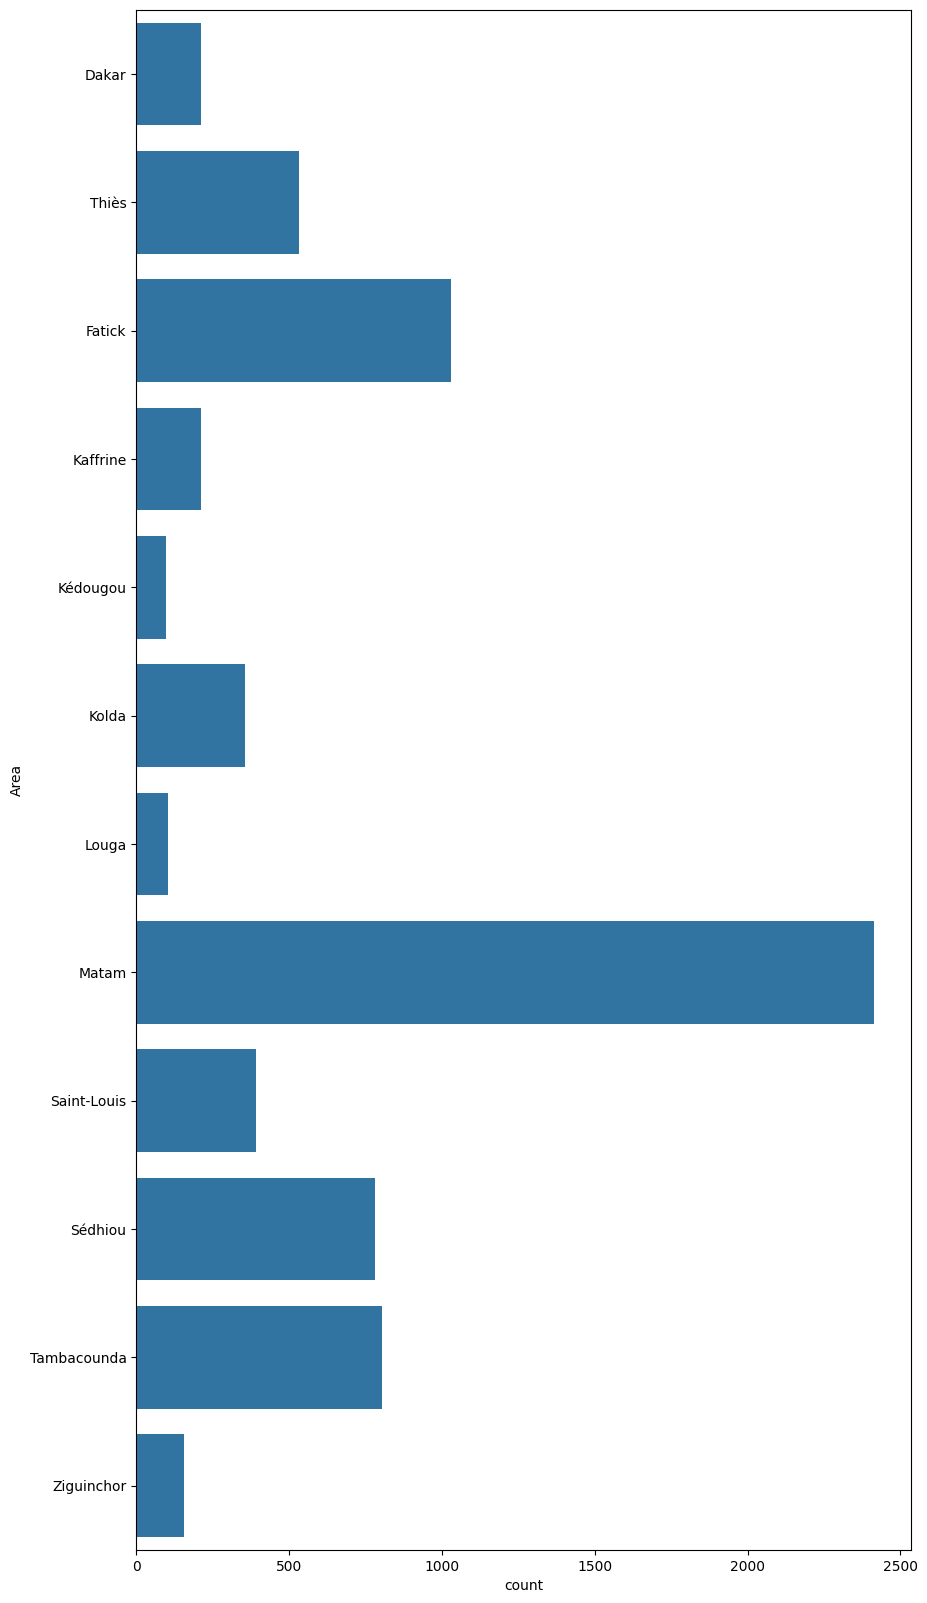

In [140]:
plt.figure(figsize=(10,20))
sns.countplot(y=df['Area'])

# Yield per country

In [142]:
len(df['Area'])
#cela duplique le nombre de regions


country = len(df['Area'].unique())

country

#Il y a 14 regions

12

In [143]:
country = (df['Area'].unique())
country

array(['Dakar', 'Thiès', 'Fatick', 'Kaffrine', 'Kédougou', 'Kolda',
       'Louga', 'Matam', 'Saint-Louis', 'Sédhiou', 'Tambacounda',
       'Ziguinchor'], dtype=object)

In [144]:
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())

In [145]:
yield_per_country

[12423000,
 38586595,
 113635162,
 15460638,
 8828606,
 20145130,
 8912921,
 173813381,
 13114483,
 45424805,
 51743979,
 16784818]

# Yield per country graph

<Axes: >

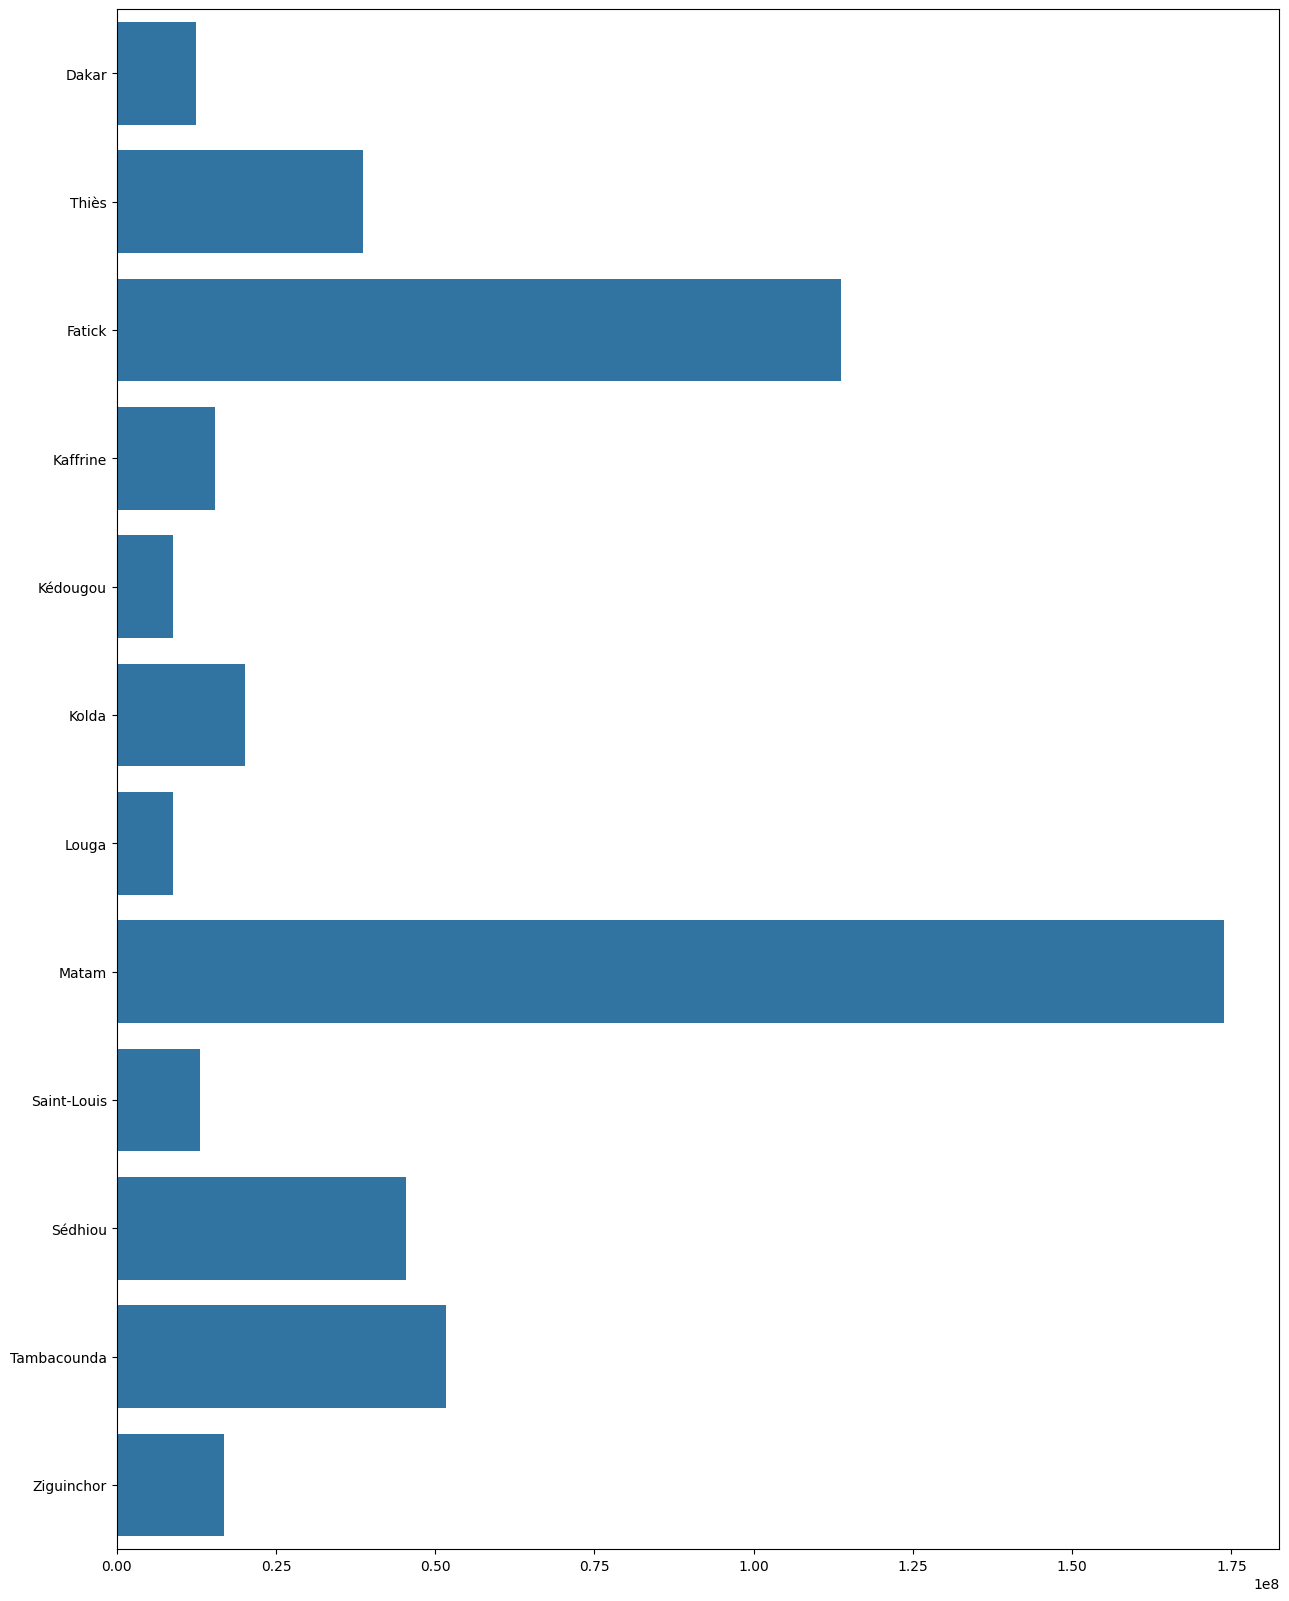

In [146]:
plt.figure(figsize=(15, 20))
sns.barplot(y=country, x=yield_per_country)

# Graph Frequency vs Item

<Axes: xlabel='count', ylabel='Item'>

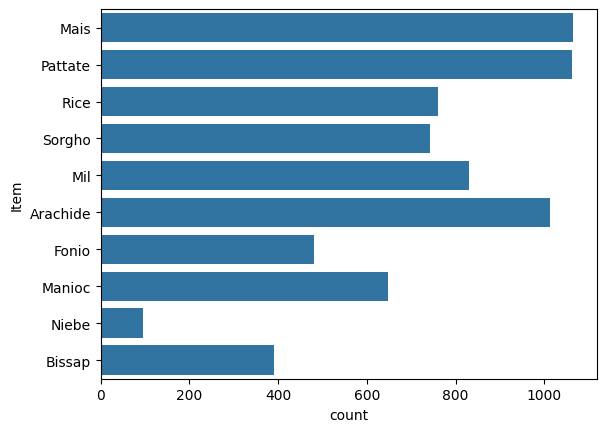

In [24]:
sns.countplot(y=df['Item'])

#Il y a plus de cultivation de potatoes et Maïs

# Yield Vs Item

In [147]:
crops = df['Item'].unique()

In [148]:
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

In [149]:
yield_per_crop
#Rendements par culture

[47985613,
 198138737,
 33213013,
 16775463,
 17184535,
 24676566,
 53339613,
 86363878,
 6203454,
 34992646]

<Axes: >

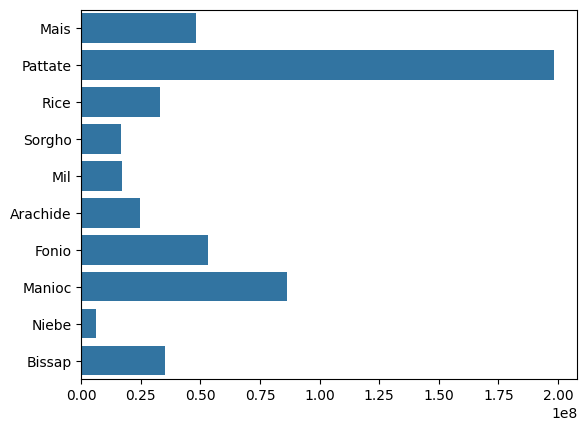

In [150]:
sns.barplot(y=crops,x=yield_per_crop)

# Train test split rearranging columns

In [29]:
df
#Output variable : hg/ha_yield et le reste ce sont des inputs. On va donc l'extraire à la fin


,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,types_de_sols
0,Dakar,Mais,1990,36613,1485.0,121.0,16.37,Limoneux
1,Dakar,Pattate,1990,66667,1485.0,121.0,16.37,Sableux
2,Dakar,Rice,1990,23333,1485.0,121.0,16.37,Limoneux
3,Dakar,Sorgho,1990,12500,1485.0,121.0,16.37,Limoneux
4,Dakar,Mil,1990,7000,1485.0,121.0,16.37,Argileux
...,...,...,...,...,...,...,...,...
7085,Ziguinchor,Arachide,2007,65610,703.0,3336.0,9.87,Argileux
7086,Ziguinchor,Pattate,2008,416339,703.0,4145.0,9.82,Limoneux
7087,Ziguinchor,Arachide,2008,78638,703.0,4145.0,9.82,Argileux
7088,Ziguinchor,Pattate,2009,415861,703.0,2836.0,9.22,Argileux


In [151]:
df.keys()

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp', 'types_de_sols'],
      dtype='object')

In [152]:
col = ['Year','types_de_sols' ,'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]


In [153]:
df

,Year,types_de_sols,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,Sableux,1485.0,121.0,16.37,Dakar,Mais,36613
1,1990,Limoneux,1485.0,121.0,16.37,Dakar,Pattate,66667
2,1990,Sableux,1485.0,121.0,16.37,Dakar,Rice,23333
3,1990,Argileux,1485.0,121.0,16.37,Dakar,Sorgho,12500
4,1990,Sableux,1485.0,121.0,16.37,Dakar,Mil,7000
...,...,...,...,...,...,...,...,...
7085,2007,Sableux,703.0,3336.0,9.87,Ziguinchor,Arachide,65610
7086,2008,Limoneux,703.0,4145.0,9.82,Ziguinchor,Pattate,416339
7087,2008,Limoneux,703.0,4145.0,9.82,Ziguinchor,Arachide,78638
7088,2009,Sableux,703.0,2836.0,9.22,Ziguinchor,Pattate,415861


In [154]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

#Ou x= df.drop('hg/ha_yield, axis=1)
#y= df['hg/ha_yield']

In [155]:
!pip install scikit-learn

You should consider upgrading via the 'C:\Users\hp\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [156]:
import sklearn
#Majoritairement pour classification, régression logistique, clustering

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

#80% dans la train et 20% dans la test

In [159]:

X_train.shape

(5672, 7)

In [160]:
X_test.shape

(1418, 7)

In [161]:
X_train

,Year,types_de_sols,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
5148,1990,Argileux,1274.0,92.08,21.15,Saint-Louis,Arachide
3011,1994,Sableux,1761.0,84312.78,19.15,Matam,Manioc
6044,2010,Argileux,537.0,61050.00,7.77,Sédhiou,Pattate
5192,1995,Argileux,1274.0,144.20,21.55,Saint-Louis,Manioc
2228,2002,Argileux,2666.0,2954.29,26.10,Kolda,Pattate
...,...,...,...,...,...,...,...
3772,2002,Sableux,1761.0,145552.00,25.18,Matam,Rice
5191,1995,Limoneux,1274.0,144.20,21.55,Saint-Louis,Mil
5226,1999,Limoneux,1274.0,150.24,21.01,Saint-Louis,Sorgho
5390,1994,Limoneux,1604.0,411.42,24.93,Sédhiou,Niebe


# Converting Categorical to Numerical and Scaling the values

In [162]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


In [163]:
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

In [164]:

X_train.head(1)

,Year,types_de_sols,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
5148,1990,Argileux,1274.0,92.08,21.15,Saint-Louis,Arachide


In [165]:
preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0,2,3,4]),
            ('OHE', ohe, [1,5,6]),
        ],
        remainder='passthrough'
)

#Le OneHotEncoder est utilisé pour traiter des variables catégorielles ou des caractéristiques nominales => on va mettre des 1 et des 0 pour mieux comprendre
#  les variables catégorielles
#Le StandardScaler est utilisé pour mettre à l'échelle les caractéristiques numériques de manière à ce qu'elles aient une moyenne (mean) de 0 et un écart-type
#  (standard deviation) de 1. ==> normalisation


#On va changer la 0eme, 1ere, 2eme et 3ème en 0 et 1 et la 4eme et 5eme colonne on laissera le nom de l'area et de l'item

In [166]:
preprocesser

# En régression, le préprocesseur (ou prétraitement) fait référence à l'ensemble des étapes et des transformations que vous appliquez à vos données avant
# de les utiliser pour entraîner un modèle de régression. Le but du prétraitement est de préparer les données de manière à ce qu'elles soient adaptées à
#  l'apprentissage automatique et à la modélisation statistique

ColumnTransformer(remainder='passthrough',
                  transformers=[('StandardScale', StandardScaler(),
                                 [0, 2, 3, 4]),
                                ('OHE', OneHotEncoder(drop='first'),
                                 [1, 5, 6])])

In [167]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [168]:
X_train_dummy

<5672x26 sparse matrix of type '<class 'numpy.float64'>'
	with 36745 stored elements in Compressed Sparse Row format>

# Training Models

In [169]:
#linear regression
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score


In [170]:
models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'Rid':Ridge(),
    'Dtr':DecisionTreeRegressor()
}
for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)

    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)}")


    #Régression Ridge et Lasso : Ce sont des variantes de la régression linéaire qui introduisent une régularisation pour éviter
    #le surajustement (overfitting) et sélectionner automatiquement les caractéristiques les plus importantes.

lr : mae : 27947.252745291957 score : 0.7043229382720795
lss : mae : 27939.46556217093 score : 0.704330094780532
Rid : mae : 27874.280328043635 score : 0.7043756114945441
Dtr : mae : 3691.837094499295 score : 0.9691947983233778


# Select model

In [171]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([17190., 24033., 32199., ..., 15541.,  7396., 95878.])

# Predictive System

In [172]:
def prediction():
    pass

In [173]:
df.head(2)

,Year,types_de_sols,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,Sableux,1485.0,121.0,16.37,Dakar,Mais,36613
1,1990,Limoneux,1485.0,121.0,16.37,Dakar,Pattate,66667


In [174]:
def prediction(Year, types_de_sols,average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create an array of the input features
    features = np.array([[Year,types_de_sols ,average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)

    # Make the prediction
    predicted_yield = dtr.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]


In [55]:
X_train.shape

(5672, 7)

In [175]:
print(y_pred[:10])
print(y_test[:10])

[17190. 24033. 32199. 44261. 41138. 94453. 22750. 58268. 12416. 38000.]
2794    17190
3590    24033
712     35063
937     44261
6987    40854
6342    91000
408     18972
6348    62796
5522    10000
2029    40000
Name: hg/ha_yield, dtype: int64


# Save Model

In [59]:
from joblib import dump, load

dump(dtr, 'dtr.hdf5')
dump(preprocesser, 'preprocesser.hdf5')

['preprocesser.hdf5']

# Estimation Revenu

In [1030]:
def estimation_revenu(semance, mainsOeuvre, engrais, prixVenteUnitaire, rendement):
    depences = semance + mainsOeuvre + engrais
    revenu = prixVenteUnitaire *rendement - depences
    return revenu

prediction_yield = prediction(1990, 'Sableux',	1274.0,	92.08,	21.15,	'Saint-Louis'	,'Arachide')
estimation_revenu(1200,200000,22400, 500, prediction_yield)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


4188400.0